|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매액(단위 : 1000달러)	|	Target	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격(달러)	|	feature	|
|	ShelveLoc 	|	 진열상태(Good, Medium, Bad)	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부(Yes, No)	|	feature	|


## 0.환경설정

* 필요한 라이브러리 로딩, 데이터셋 가져오기

### 1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst                              # 가설검정 도구 가져오기

### 2) 데이터 불러오기

In [30]:
path = 'https://raw.githubusercontent.com/JunhoYu/Data-Analysis/main/Carseats.csv'
data = pd.read_csv(path)
data.drop(['Urban', 'Education'],axis = 1, inplace = True)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,US
0,9.50,138,73,11,276,120,Bad,42,Yes
1,11.22,111,48,16,260,83,Good,65,Yes
2,10.06,113,35,10,269,80,Medium,59,Yes
3,7.40,117,100,4,466,97,Medium,55,Yes
4,4.15,141,64,3,340,128,Bad,38,No


## 1.가설수립

## 2.단변량 분석

① 변수의 비즈니스 의미  

② 숫자? 범주?  

③ NaN 존재 여부 및 조치 방안  

④ 기초통계량  

⑤ 분포  

⑥ 위 정보로부터 파악한 내용(비즈니스!) 정리  

⑦ 추가 분석해볼 사항 도출

### 1) Sales

In [3]:
var = 'Sales'

1) 변수의 비즈니스 의미

* 각 지역 판매액 

2) 숫자, 범주?

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   Income       400 non-null    int64  
 2   Advertising  400 non-null    int64  
 3   Population   400 non-null    int64  
 4   Price        400 non-null    int64  
 5   ShelveLoc    400 non-null    object 
 6   Age          400 non-null    int64  
 7   US           400 non-null    object 
dtypes: float64(1), int64(5), object(2)
memory usage: 25.1+ KB


* 숫자

3) NaN 존재 유무

In [5]:
data[var].isna().sum()

0

* NaN값은 존재하지 않는다

4) 기초통계량(수치화)

In [6]:
data[var].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

5) 분포 확인(시각화)

<AxesSubplot:xlabel='Sales', ylabel='Count'>

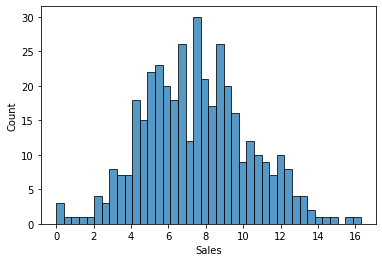

In [7]:
sns.histplot(data[var], bins=40)

<AxesSubplot:xlabel='Sales', ylabel='Density'>

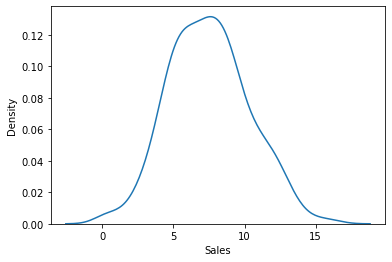

In [8]:
sns.kdeplot(data[var])

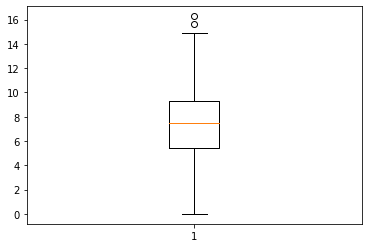

0.0 14.9


In [9]:
box = plt.boxplot(data[var])
plt.show()

l_fence = box['whiskers'][0].get_ydata()[1]
u_fence = box['whiskers'][1].get_ydata()[1]
print(l_fence, u_fence)

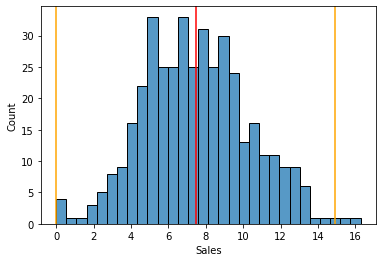

In [10]:
avg = data[var].mean()

sns.histplot(data[var], bins = 30)


plt.axvline(l_fence, color = 'orange')
plt.axvline(avg, color = 'r')
plt.axvline(u_fence, color = 'orange')
plt.show()

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 대체로 4~10 사이에서 판매액 분포도가 가장 많다.
> * 판매액이 매우 낮은 지역에는 어떤 문제가 있는가..? 

7) 추가 분석해 볼 사항

> * 판매액과 관련하여 광고예산 / 인구밀도 / 진열상태 등 .. 어떠한 상관관계가 존재하는 확인 필요 ! 

### 2) Advertising

In [18]:
var = 'Advertising'

1) 변수의 비즈니스 의미

* 각 지역, 회사의 광고예산

2) 숫자, 범주?

* 숫자

3) NaN 존재 유무

In [19]:
data[var].isna().sum()

0

* NaN값은 존재하지 않는다

4) 기초통계량(수치화)

In [20]:
data[var].describe()

count    400.000000
mean       6.635000
std        6.650364
min        0.000000
25%        0.000000
50%        5.000000
75%       12.000000
max       29.000000
Name: Advertising, dtype: float64

5) 분포 확인(시각화)

<AxesSubplot:xlabel='Advertising', ylabel='Density'>

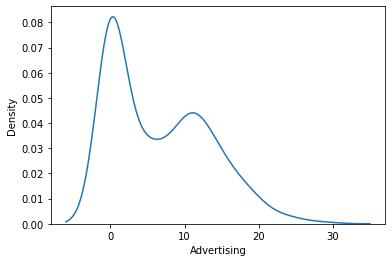

In [22]:
sns.kdeplot(data[var])

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 광고 예산에 크게 비중을 두지 않는 지역이나 회사가 많다.

7) 추가 분석해 볼 사항

> * 광고 예산과 판매액과의 관계는 존재할 것인가?
> * 조금이나마 광고 예산을 투자하는 지역에는 어떠한 특성이 있는가 ? 
> * 0인 부분을 제외하고 나머지 부분들에 대해 나누어서 분석해보는 것

### 3) Population

In [23]:
var = 'Population'

1) 변수의 비즈니스 의미

* 지역 인구수

2) 숫자, 범주?

* 숫자

3) NaN 존재 유무

In [24]:
data[var].isnull().sum()

0

4) 기초통계량(수치화)

In [25]:
data[var].describe()

count    400.000000
mean     264.840000
std      147.376436
min       10.000000
25%      139.000000
50%      272.000000
75%      398.500000
max      509.000000
Name: Population, dtype: float64

5) 분포 확인(시각화)

<AxesSubplot:xlabel='Population', ylabel='Count'>

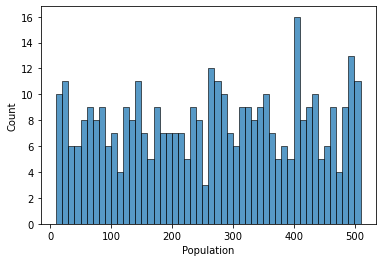

In [28]:
sns.histplot(data[var], bins=50)

<AxesSubplot:xlabel='Population', ylabel='Density'>

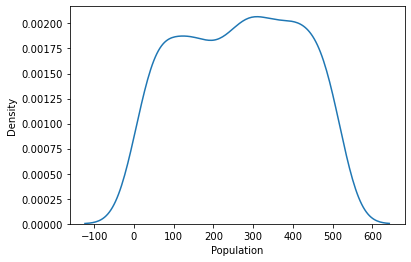

In [27]:
sns.kdeplot(data[var])

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 인구 분포에 있어서는 인구수가 적은 지역부터 많은 지역까지 골고루 분포되어져 있다.

7) 추가 분석해 볼 사항

> * 인구 밀도에 따라 판매액과는 관련이 있는가 ? 
> * 인구 밀도에 따라 광고 예산도 차이가 있지 않을까 ? 
> * 유독히 낮은 부분에는 어떠한 문제점이 있는지 그 부분만 확인 가능할까 ? 

### 4) Price

In [29]:
var = 'Price'

1) 변수의 비즈니스 의미

* 자사 지역별 판매 가격

2) 숫자, 범주?

* 숫자

3) NaN 존재 유무

In [30]:
data[var].isna().sum()

0

* NaN값이 존재하지 않는다.

4) 기초통계량(수치화)

In [31]:
data[var].describe()

count    400.000000
mean     115.795000
std       23.676664
min       24.000000
25%      100.000000
50%      117.000000
75%      131.000000
max      191.000000
Name: Price, dtype: float64

5) 분포 확인(시각화)

<AxesSubplot:xlabel='Price', ylabel='Count'>

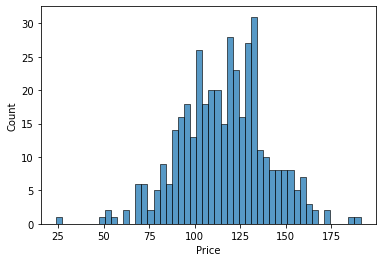

In [33]:
sns.histplot(data[var], bins=50)

<AxesSubplot:xlabel='Price', ylabel='Density'>

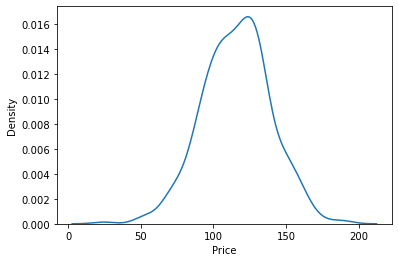

In [32]:
sns.kdeplot(data[var])

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 가격이 지역별로 차이가 큰데 차이가 큰이유는 무엇일까 ,, ? 
> * 대부분 90~130 사이의 가격이 비중이 높다. 

7) 추가 분석해 볼 사항

> * 가격이 지역별로 크게 차이가 나는 경우가 있는데 그 이유는 ?? 
> * 가격에 따라 판매액과도 관련이 있을까 ? 
> * 특정 가격대에 따라 신뢰도의 차이가 있는가 ?!

### 5) ShelveLoc

In [36]:
var = 'ShelveLoc'

1) 변수의 비즈니스 의미

* 진열상태

2) 숫자, 범주?

* 범주

3) NaN 존재 유무

In [37]:
data[var].isna().sum()

0

* NaN값이 존재하지 않는다.

4) 기초통계량(수치화)

In [38]:
data[var].describe()

count        400
unique         3
top       Medium
freq         219
Name: ShelveLoc, dtype: object

In [42]:
print(data[var].value_counts())
print(data[var].value_counts()/ len(data[var]))

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64
Medium    0.5475
Bad       0.2400
Good      0.2125
Name: ShelveLoc, dtype: float64


5) 분포 확인(시각화)

<AxesSubplot:xlabel='ShelveLoc', ylabel='Count'>

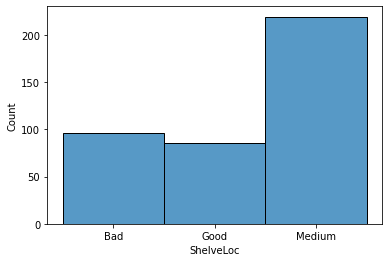

In [40]:
sns.histplot(data[var])

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ShelveLoc', ylabel='count'>

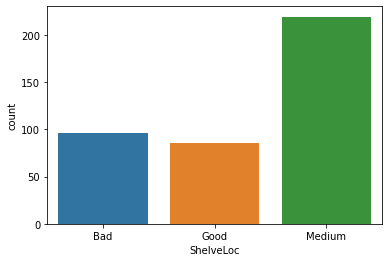

In [43]:
sns.countplot(data[var])

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 진열상태가 중간 정도인 부분에서 높게 나타남
> * 진열 상태가 안좋은 지역과 좋은 지역의 비율은 비슷한 수준으로 보임

7) 추가 분석해 볼 사항

> * 진열 상태에 따른 매출액과의 관련이 있는가 ?
> * 매출액과 관련이 있다면 수정할 부분이 있는가 ?!

### 6) Age

In [44]:
var = 'Age'

1) 변수의 비즈니스 의미

* 지역 인구의 평균 연령

2) 숫자, 범주?

* 숫자

3) NaN 존재 유무

In [45]:
data[var].isna().sum()

0

* NaN값이 존재하지 않는다

4) 기초통계량(수치화)

In [46]:
data[var].describe()

count    400.000000
mean      53.322500
std       16.200297
min       25.000000
25%       39.750000
50%       54.500000
75%       66.000000
max       80.000000
Name: Age, dtype: float64

5) 분포 확인(시각화)

<AxesSubplot:xlabel='Age', ylabel='Count'>

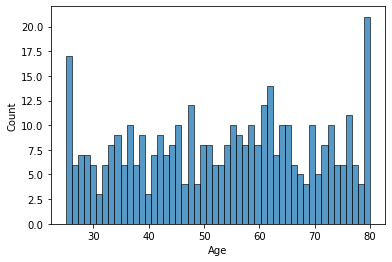

In [49]:
sns.histplot(data[var], bins=50)

<AxesSubplot:xlabel='Age', ylabel='Density'>

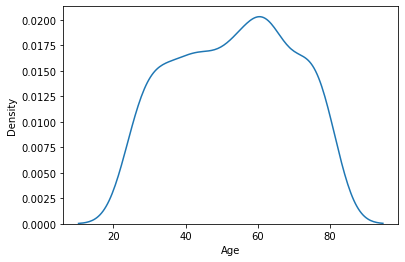

In [48]:
sns.kdeplot(data[var])

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 평균 연령대의 분포가 골고루 퍼져있기는 하나 50~70 사이에 조금 더 높은 것을 확인할 수 있다.
> * 20대 즈음과 80대에서 압도적으로 높은 지역이 존재하는데 왜그런가 .. ?

7) 추가 분석해 볼 사항

> * 연령대 별로 판매액과는 관계가 있을까? 
> * 실제로 구매하는 층이 어디에 많이 존재하는 것인지 확인해볼 필요 有

### 7) US

In [16]:
var = 'US'

1) 변수의 비즈니스 의미

* 매장이 미국에 존재하는지 여부

2) 숫자, 범주?

* 범주

3) NaN 존재 유무

In [17]:
data[var].isna().sum()

0

* NaN값이 존재하지 않는다.

4) 기초통계량(수치화)

In [18]:
data[var].describe()

count     400
unique      2
top       Yes
freq      258
Name: US, dtype: object

In [19]:
print(data[var].value_counts())
print(data[var].value_counts()/ len(data[var]))

Yes    258
No     142
Name: US, dtype: int64
Yes    0.645
No     0.355
Name: US, dtype: float64


5) 분포 확인(시각화)

<AxesSubplot:xlabel='US', ylabel='Count'>

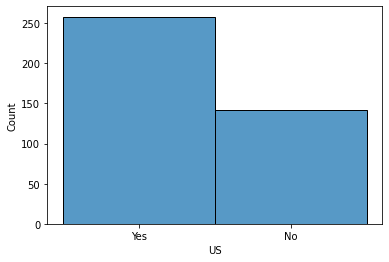

In [20]:
sns.histplot(data[var])

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='US', ylabel='count'>

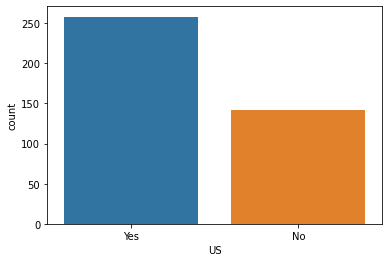

In [22]:
sns.countplot(data[var])

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 미국에 존재하는 매장이 많기는 하나 생각보다 해외에 있는 매장의 수도 많다.

7) 추가 분석해 볼 사항

> * 미국에 존재하는지 여부에 따라 판매액의 차이가 있는가 ? 

### 8) Income

In [23]:
var = 'Income'

1) 변수의 비즈니스 의미

* 매장이 미국에 존재하는지 여부

2) 숫자, 범주?

* 범주

3) NaN 존재 유무

In [24]:
data[var].isna().sum()

0

* NaN값이 존재하지 않는다.

4) 기초통계량(수치화)

In [25]:
data[var].describe()

count    400.000000
mean      68.657500
std       27.986037
min       21.000000
25%       42.750000
50%       69.000000
75%       91.000000
max      120.000000
Name: Income, dtype: float64

5) 분포 확인(시각화)

<AxesSubplot:xlabel='Income', ylabel='Count'>

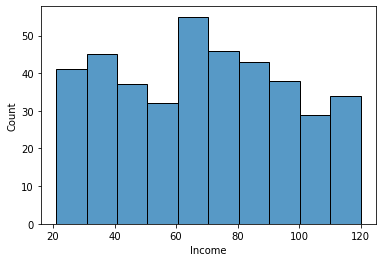

In [26]:
sns.histplot(data[var])

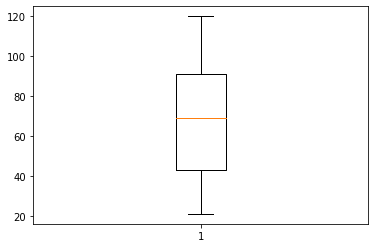

21.0 120.0


In [27]:
box = plt.boxplot(data[var])
plt.show()

l_fence = box['whiskers'][0].get_ydata()[1]
u_fence = box['whiskers'][1].get_ydata()[1]
print(l_fence, u_fence)

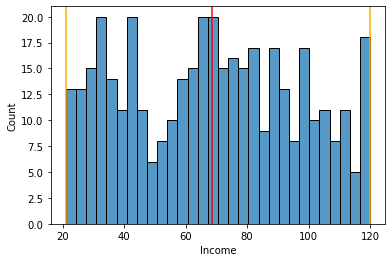

In [28]:
avg = data[var].mean()

sns.histplot(data[var], bins = 30)


plt.axvline(l_fence, color = 'orange')
plt.axvline(avg, color = 'r')
plt.axvline(u_fence, color = 'orange')
plt.show()

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 미국에 존재하는 매장이 많기는 하나 생각보다 해외에 있는 매장의 수도 많다.

7) 추가 분석해 볼 사항

> * 미국에 존재하는지 여부에 따라 판매액의 차이가 있는가 ? 

## 3.이변량 분석 
* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.

In [ ]:
target = 'Sales'

### (1) 숫자형(수치형) X --> Y
* 모든 숫자형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : scatter, jointplot  
② 수치화 : 상관분석

#### 1) Advertising -> Sales

① 시각화 : scatter(regplot), jointplot

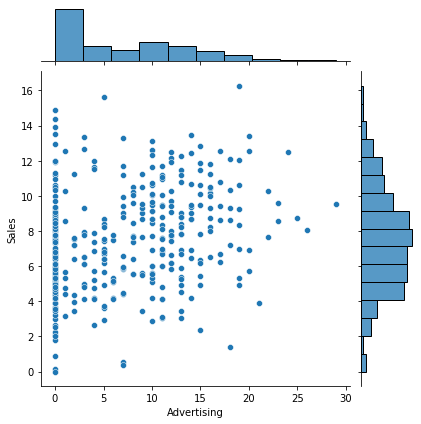

In [60]:
sns.jointplot(x='Advertising', y='Sales', data=data)
plt.show()

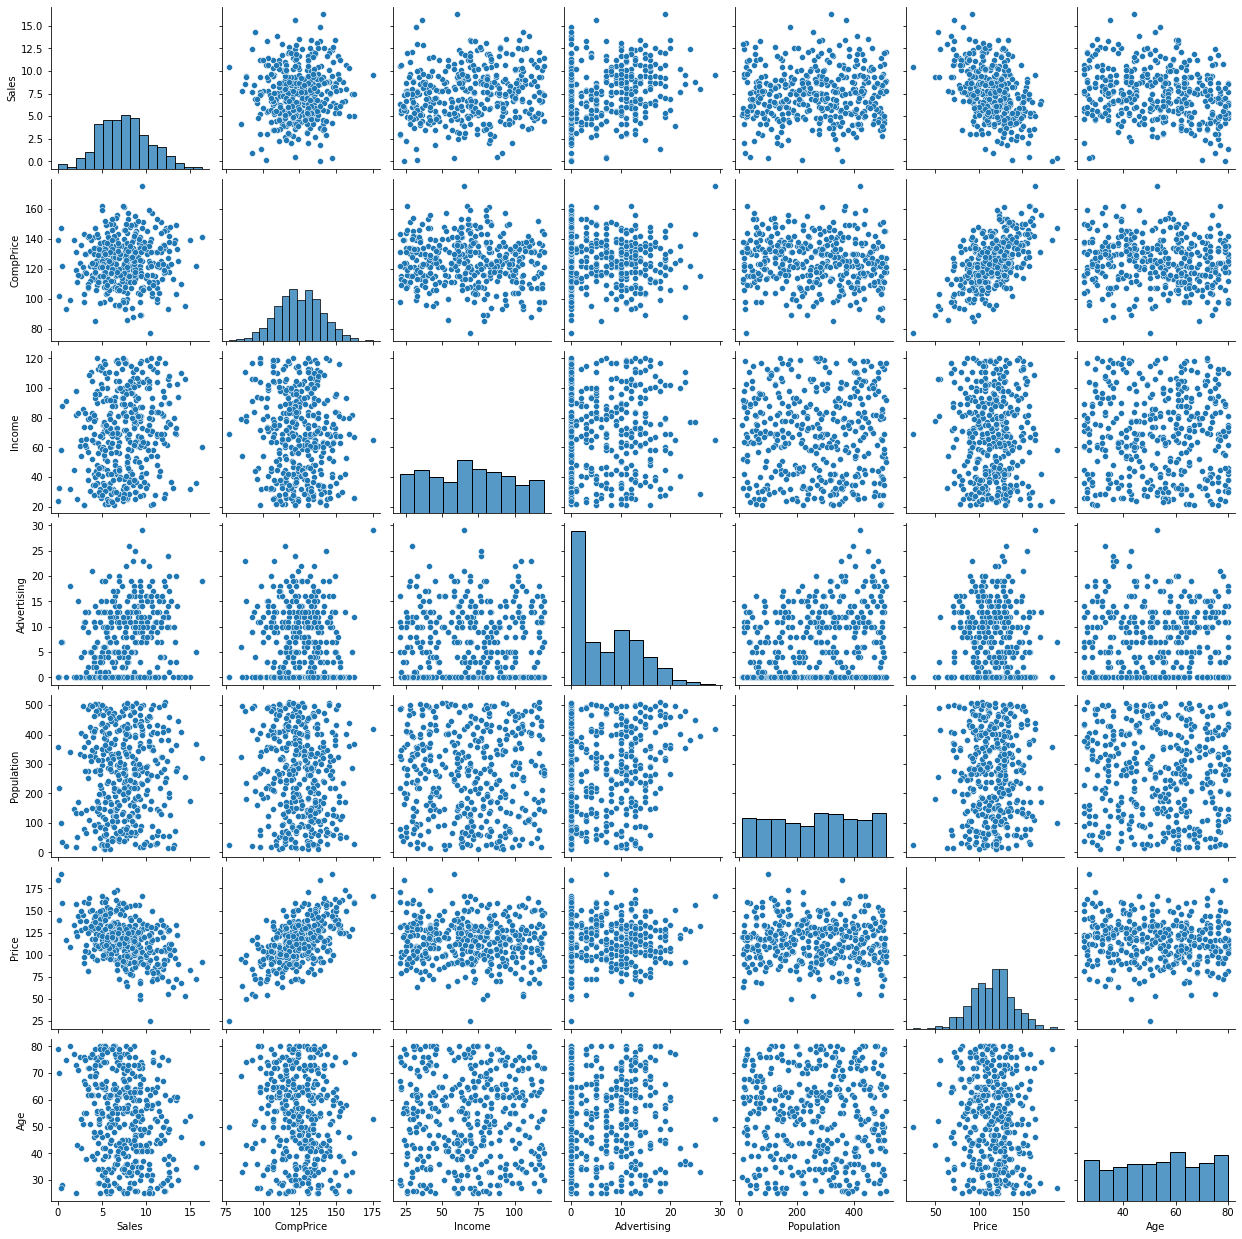

In [37]:
sns.pairplot(data)
plt.show()

② 수치화 : 상관분석

In [62]:
import scipy.stats as spst

In [63]:
spst.pearsonr(data['Advertising'], data['Sales'])

(0.269506781376902, 4.377677110302732e-08)

In [38]:
data.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000


③ 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

* 시각화 자료에서는 어떠한 상관관계가 존재하는지 확인하기가 어렵다.
* 상관관계 수치가 높지는 않은 것으로 보아 어느정도의 상관관계만이 존재할지도 모른다. 

#### 2) Population -> Sales

① 시각화 : scatter(regplot), jointplot

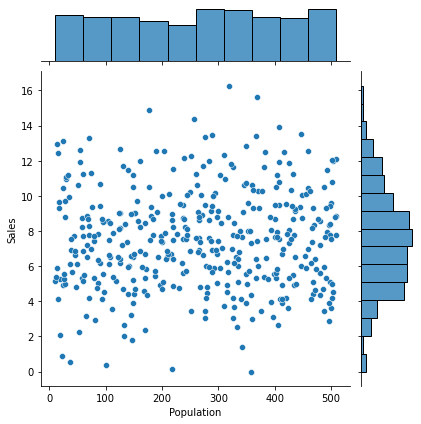

In [66]:
sns.jointplot(x='Population', y='Sales', data=data)
plt.show()

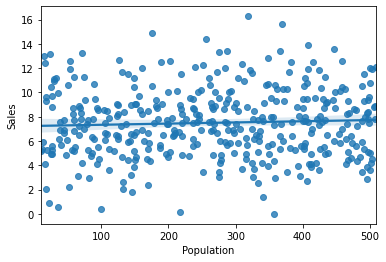

In [67]:
sns.regplot(x='Population', y='Sales', data=data)
plt.show()

② 수치화 : 상관분석

In [68]:
spst.pearsonr(data['Population'], data['Sales'])

(0.0504709844720392, 0.31398160931903)

③ 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

* 시각화 자료에서나 상관분석 수치자료를 통해 확인해본 결과 상관관계가 거의 없을 것이라 판단되어진다. 
* 상관관계가 매우 약할 것으로 판단.

#### 3) Price -> Sales

① 시각화 : scatter(regplot), jointplot

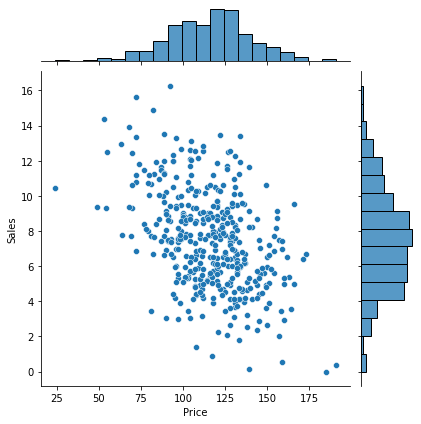

In [69]:
sns.jointplot(x='Price', y='Sales', data=data)
plt.show()

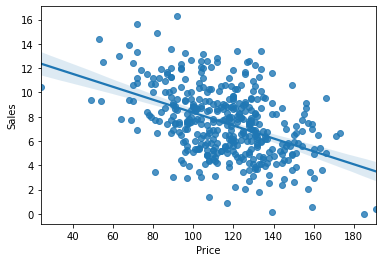

In [70]:
sns.regplot(x='Price', y='Sales', data=data)
plt.show()

② 수치화 : 상관분석

In [71]:
spst.pearsonr(data['Price'], data['Sales'])

(-0.4449507278465726, 7.61818701191294e-21)

③ 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

* 그래프에서 음의 상관관계가 눈으로 확인되어진다. 
* 수치화에서도 어느정도의 관계를 가지고 있는 것으로 나타남으로 상관관계가 존재한다고 판단.

#### 4) Age -> Sales

① 시각화 : scatter(regplot), jointplot

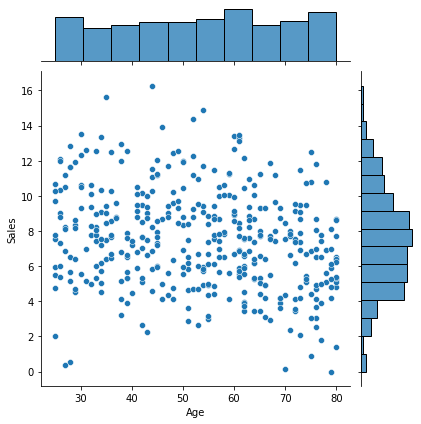

In [72]:
sns.jointplot(x='Age', y='Sales', data=data)
plt.show()

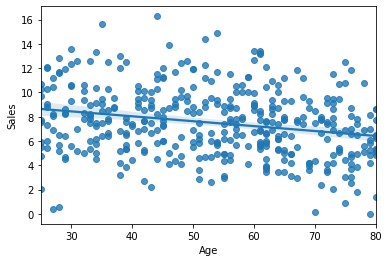

In [73]:
sns.regplot(x='Age', y='Sales', data=data)
plt.show()

② 수치화 : 상관분석

In [74]:
spst.pearsonr(data['Age'], data['Sales'])

(-0.2318154396045765, 2.7889498393711916e-06)

③ 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

* 시각화 자료에서는 아주 약하게나마 음의 상관관계가 존재할지도 모르겠다는 생각이 든다. 
* 수치화에서도 동일하게 어느정도 상관관계가 존재한다고 볼 수 있다 .

### (2) 범주형 X --> Y

* 모든 범자형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : 평균비교 barplot  
② 수치화 : t-test, anova

#### 1) ShelveLoc-> Sales

① 시각화 : 평균비교 barplot

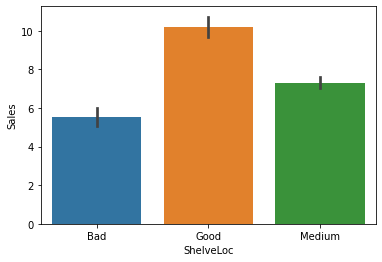

In [75]:
sns.barplot(x='ShelveLoc', y='Sales', data=data)
plt.show()

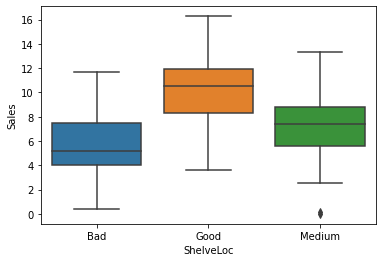

In [76]:
sns.boxplot(x='ShelveLoc', y='Sales', data=data)
plt.show()

② 수치화 : t-test, anova

In [89]:
print(data['ShelveLoc'].value_counts())

a1 = data.loc[data['ShelveLoc'] == 'Bad', 'Sales']
a2 = data.loc[data['ShelveLoc'] == 'Medium', 'Sales']
a3 = data.loc[data['ShelveLoc'] == 'Good', 'Sales']


Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64


In [90]:
spst.f_oneway(a1,a2,a3)

F_onewayResult(statistic=92.22990509910348, pvalue=1.26693609015938e-33)

③ 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

* 시각화를 통해 확인한 결과 강한 상관관계가 존재할 것으로 보인다. 
* p-value의 값이 0에 가까움으로 상관관계가 분명히 존재할 것으로 판단.

#### 2) US-> Sales

① 시각화 : 평균비교 barplot

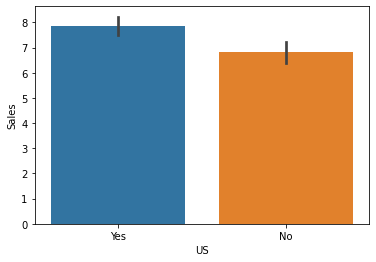

In [91]:
sns.barplot(x='US', y='Sales', data=data)
plt.show()

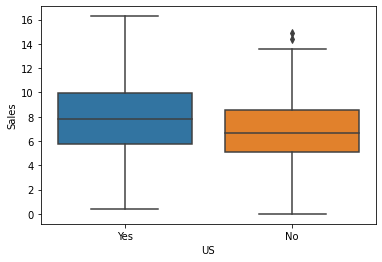

In [92]:
sns.boxplot(x='US', y='Sales', data=data)
plt.show()

② 수치화 : t-test, anova

In [98]:
d_y = data.loc[data['US']=='Yes' , 'Sales']
d_n = data.loc[data['US']=='No', 'Sales']

d_n.value_counts()

6.53    3
5.08    2
7.52    2
5.68    2
7.80    2
       ..
5.73    1
7.74    1
5.36    1
8.47    1
5.97    1
Name: Sales, Length: 134, dtype: int64

In [99]:
spst.ttest_ind(d_y,d_n)

Ttest_indResult(statistic=3.589738747802499, pvalue=0.00037233958701471517)

③ 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

* 시각화 자료에서 높지는 않지만 약간의 상관관계가 존재할수도 있다는 판단. 
* 수치화 결과로부터 p-value의 값이 0에 가까움으로 상관관계가 존재한다고 판단

## 4.관계 정리

### 1) 강한관계의 변수

ShelveLoc , Price 

### 2) 약한관계의 변수

In [ ]:
Advertising , US , Age

### 3) 관계 없음

In [ ]:
Population

### 4) 추가 분석

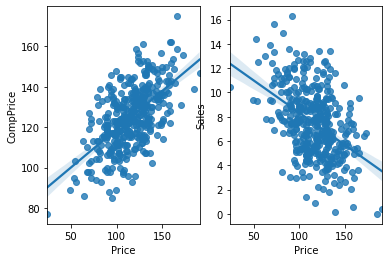

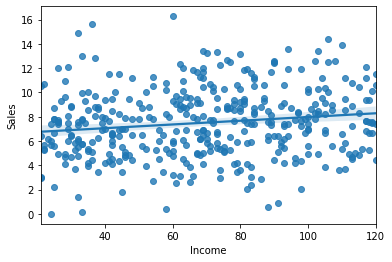

In [44]:
plt.subplot(1,2,1)
sns.regplot(x='Price', y='CompPrice', data=data)
plt.subplot(1,2,2)
sns.regplot(x='Price', y='Sales',data=data)

plt.show()

sns.regplot(x='Income', y='Sales', data=data)
plt.show()


In [41]:
data.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000


In [42]:
spst.pearsonr(data['Income'], data['Sales'])

(0.15195097946754424, 0.0023096704539517627)

<AxesSubplot:xlabel='Price', ylabel='Density'>

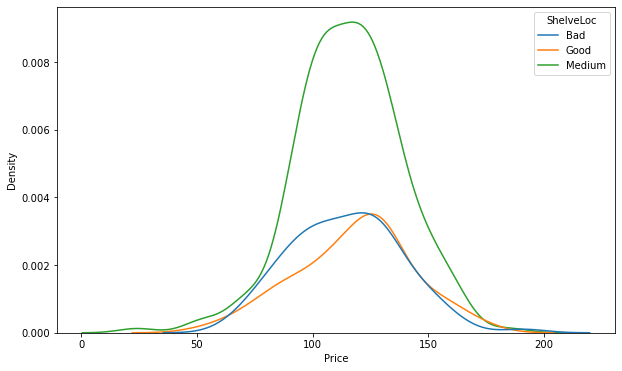

In [52]:

plt.figure(figsize = (10,6))
sns.kdeplot(x='Price', data=data, hue='ShelveLoc')
# plt.subplot(1,2,2)
# sns.regplot(x='Price', y='Sales',data=data)

# plt.show()